### Investigation on credit risk migration in terms of branches


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
%matplotlib inline
#%matplotlib widget
%matplotlib ipympl
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Dataset.csv")

In [3]:
df["CAPITAL"]=df["RWA"]* 8/100

#### PD and LGD are exposure weighted by EAD based on the following formula:
∑(PD×EAD)/∑(EAD)   
∑(LGD×EAD)/∑(EAD)

In [4]:
df["Risk_Weight"]= df["RWA"]/df["EAD_AMOUNT"]
df["PD1"] = df["PD"] * df["EAD_AMOUNT"]
df["LGD1"]=df["LGD"] * df["EAD_AMOUNT"]

In [5]:
k = df.groupby(['CUSTOMER_ID',"PERIOD","BRANCH"]).agg({"EAD_AMOUNT":np.sum,"PD1":np.sum,"LGD1":np.sum,"EXPECTED_LOSS":np.sum,"Risk_Weight":np.mean,"CAPITAL":np.mean})
k["PD_weighted"]=k["PD1"]*1/k["EAD_AMOUNT"]
k["LGD_weighted"]=k["LGD1"]*1/k["EAD_AMOUNT"]
k

EAD_AMOUNT          PD1        LGD1  \
CUSTOMER_ID PERIOD  BRANCH                                           
A1          Period1 Amsterdam    169748.3  4243.707500  76386.7350   
            Period2 Amsterdam    174486.4    52.345920  78518.8800   
A100023     Period1 Sydney          441.1     5.500517    121.7436   
            Period2 Sydney          938.9    11.708083    259.1364   
A100049     Period1 Sydney          161.7     0.168168     32.9868   
...                                   ...          ...         ...   
Z99944      Period1 Sydney           13.9     0.076867      3.6835   
Z99970      Period1 Sydney          277.2     0.432432    102.8412   
            Period2 Sydney          653.4     0.679536    242.4114   
Z99996      Period1 Sydney          430.2     0.671112    135.5130   
            Period2 Sydney          921.2     1.437072    290.1780   

                               EXPECTED_LOSS  Risk_Weight    CAPITAL  \
CUSTOMER_ID PERIOD  BRANCH                                             
A1          Period1 Amsterdam         1909.7     1.294848  17583.864   
            Period2 Amsterdam           23.6     0.153102   2137.136   
A100023     Period1 Sydney               1.5     0.547495     19.320   
            Period2 Sydney               3.2     0.564384     42.392   
A100049     Period1 Sydney               0.0     0.087817      1.136   
...                                      ...          ...        ...   
Z99944      Period1 Sydney               0.0     0.273381      0.304   
Z99970      Period1 Sydney               0.2     0.200577      4.448   
            Period2 Sydney               0.3     0.158708      8.296   
Z99996      Period1 Sydney               0.2     0.301255     10.368   
            Period2 Sydney               0.5     0.269214     19.840   

                               PD_weighted  LGD_weighted  
CUSTOMER_ID PERIOD  BRANCH                                
A1          Period1 Amsterdam      0.02500         0.450  
            Period2 Amsterdam      0.00030         0.450  
A100023     Period1 Sydney         0.01247         0.276  
            Period2 Sydney         0.01247         0.276  
A100049     Period1 Sydney         0.00104         0.204  
...                                    ...           ...  
Z99944      Period1 Sydney         0.00553         0.265  
Z99970      Period1 Sydney         0.00156         0.371  
            Period2 Sydney         0.00104         0.371  
Z99996      Period1 Sydney         0.00156         0.315  
            Period2 Sydney         0.00156         0.315  

[1136518 rows x 8 columns]

In [6]:
result = k.pivot_table(index=["BRANCH"], columns='PERIOD', values=['EXPECTED_LOSS',"Risk_Weight","PD_weighted","LGD_weighted","CAPITAL"],aggfunc={'EXPECTED_LOSS':np.sum,"PD_weighted":np.sum,"LGD_weighted":np.sum,"Risk_Weight":np.mean,"CAPITAL":np.mean})

In [7]:
result["EL_changed"]=result[('EXPECTED_LOSS', 'Period1')]-result[('EXPECTED_LOSS', 'Period2')]

In [8]:
result["LGD_changed"]=result[( 'LGD_weighted', 'Period1')]-result[( 'LGD_weighted', 'Period2')]

In [9]:
result["PD_changed"]=result[(  'PD_weighted', 'Period1')]-result[(  'PD_weighted', 'Period2')]

In [10]:
result["Risk_Weight_changed"]=result[(  'Risk_Weight', 'Period1')]-result[(  'Risk_Weight', 'Period2')]

In [11]:
result["CAPITAL_changed"]=result[(  'CAPITAL', 'Period1')]-result[(  'CAPITAL', 'Period2')]

In [12]:
result["CAPITAL_TOTAL"] = result[(  'CAPITAL', 'Period1')] + result[(  'CAPITAL', 'Period2')]

In [15]:
# normalise data
cols = ["EL_changed", "LGD_changed", "PD_changed", "Risk_Weight_changed","CAPITAL_changed"]
cols_normalised = [col+"_normalised" for col in cols]
t = result[cols].copy().reset_index()
t[cols_normalised] = (t[cols]-t[cols].min())/(t[cols].max()-t[cols].min())

In [16]:
# restructure data for seaborn
tm = t[["BRANCH"]+cols_normalised].melt('BRANCH', var_name='columns', value_name='normalised_values')

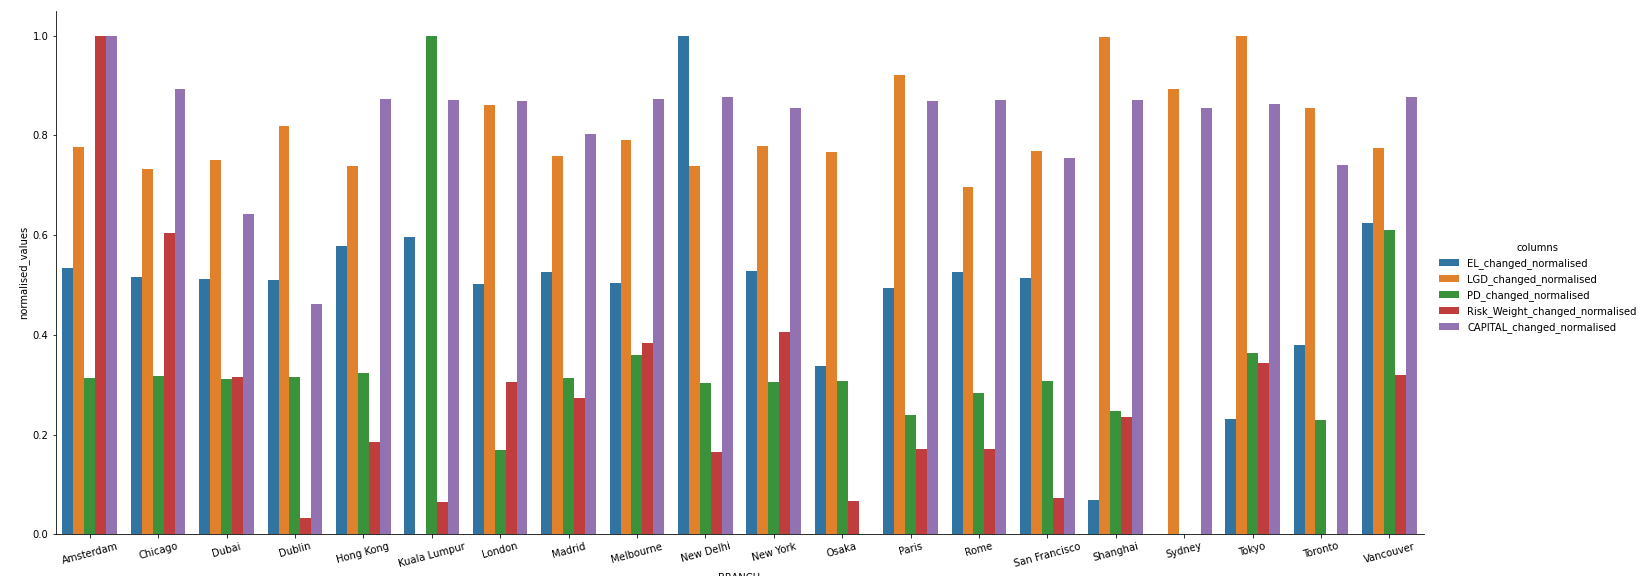

In [17]:
g = sns.catplot(data=tm, x="BRANCH", hue="columns", y="normalised_values", kind="bar", height=8 ,aspect=2.5)
g.set_xticklabels(rotation=15)


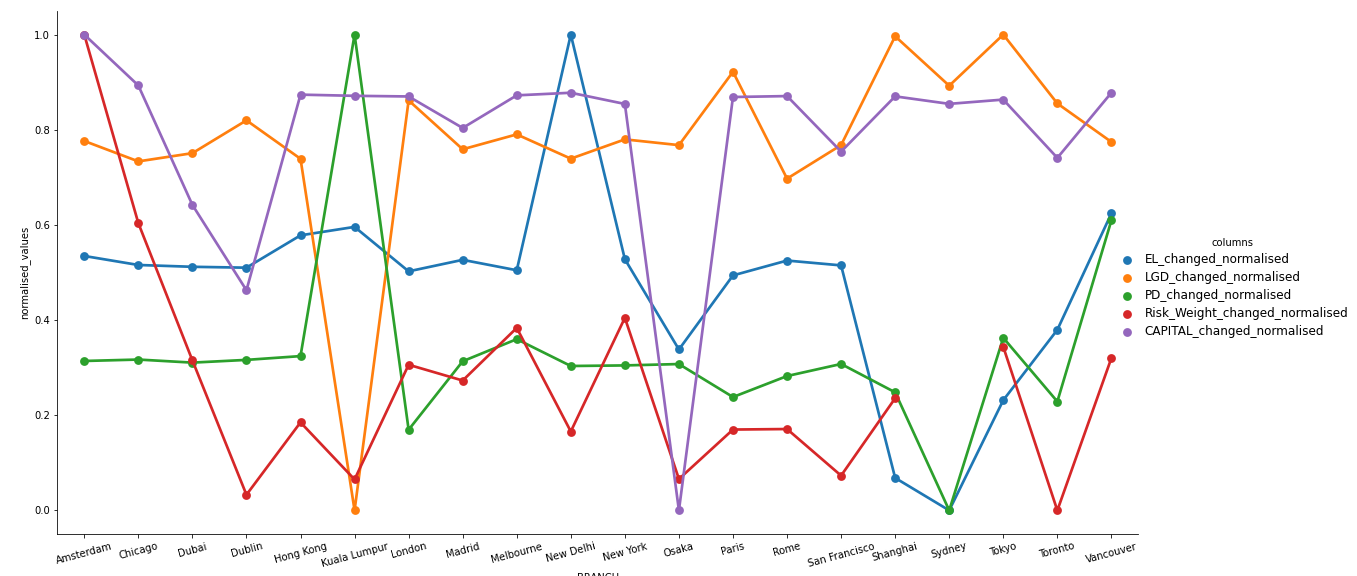

In [18]:
g = sns.catplot(data=tm, x="BRANCH", y="normalised_values", hue="columns", kind="point", height=8 ,aspect=2)
#plt.legend(fontsize='x-large', title_fontsize='40')
plt.setp(g._legend.get_texts(), fontsize=12)
g.set_xticklabels(rotation=15)
